# 서울시 코로나19 현황분석

## 1. 초반 세팅

### 1.1. 그래프 한글 출력을 위한 세팅

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프를 노트북 안에 그리기 위해 설정 
%matplotlib inline

c:\Users\com\anaconda3\envs\vscode\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\com\anaconda3\envs\vscode\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


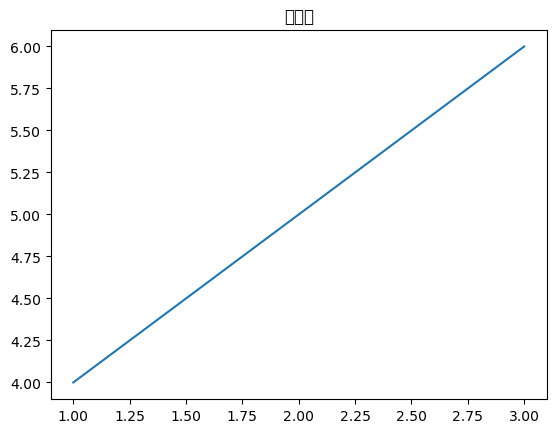

In [2]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('그래프')
plt.show()

그래프 제목이 영어가 아니라 한글이라 잘 깨진다.  
한글을 사용할 수 있도록 아래의 코드를 실행해 보자. 

In [3]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'Gulim'

In [4]:
# 폰트 확인하기
[f.name for f in fm.fontManager.ttflist if 'Gulim' in f.name]

['Gulim']

그러면 위의 그래프를 출력하는 코드를 다시 한 번 실행해 보자. 

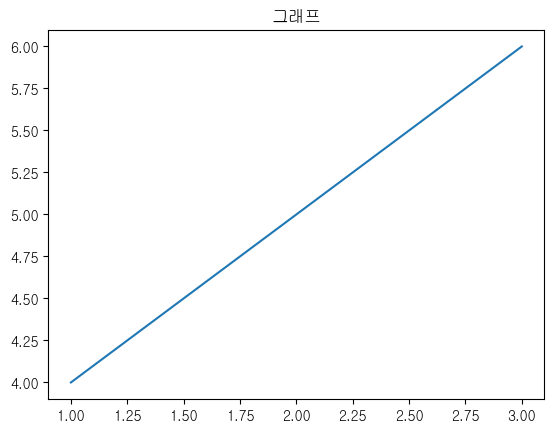

In [5]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('그래프')
plt.show()

한글 글씨체가 잘 보이게 된다. 

### 1.2. 데이터 불러오기
- https://data.seoul.go.kr/dataList/literacy/View.do ( 404로 안 열린다. / 서울 열린데이터광장 )
- 파일을 utf-8로 변환하여 사용
- 이미 데이터 있어서 받지 않음 ( 'data/서울시 코로나19 확진자 현황.csv' )

In [6]:
df = pd.read_csv('data/서울시 코로나19 확진자 현황.csv')
df.head()

C:\Users\com\AppData\Local\Temp\ipykernel_7092\2287138676.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/서울시 코로나19 확진자 현황.csv')


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


현재 내 결과에서는 한글이 깨지지 않지만, 강의 내 주피터 노트북에서는 한글이 깨졌었다.  
인코딩 옵션을 부여하는 코드는 다음과 같다. 

In [7]:
# df = pd.read_csv('data/서울시 코로나19 확진자 현황.csv', encoding = 'cp949')

혹은 csv 파일을 열어서 utf-8로 문자 형변환을 한 후 다시 저장해야 한다. 

pandas로 읽기 위한 기타 csv 파일 설정으로는 
1. 무조건 맨 처음 행( 1번째 행 )으로는 각 데이터의 속성 column이 들어와야 한다. 
    - 간혹 데이터 위에 metadata가 저장된 경우가 있으므로, 삭제해줘야 한다. 
2. csv 파일은 , 기호로 데이터를 구분하기 때문에, 엑셀 파일의 셀 하나 안에 ,가 들어있는 내용이 있으면 제거해줘야 한다. 
    - 셀 찾기를 통해 ,가 있는 셀을 찾고, 일일이 삭제해줘야 한다. 

설정을 모두 마친 후, '다른 이름으로 저장하기' 에서  
CSV UTF-8(쉼표로 분리) 항목으로 파일 확장자를 설정한 후 저장하기를 누른다. 

![nn](./screenshot/20.PNG)

만약 저장 옵션이 없으면 , 
- 일단 csv 파일로 저장한 후
- 메모장에서 다시 열어서, 여기서 utf-8로 다시 저장한다. 

![nn](./screenshot/21.PNG)

## 2. 데이터 확인 및 전처리

In [8]:
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


### 2.1. 컬럼별 데이터 확인 

In [9]:
df['환자번호'].unique() # '환자번호', '국적', '환자정보', '조치사항' 모두 null만 들어 있다. 

array([nan])

필요없는 column을 삭제한다. 

In [10]:
df.drop(columns=['환자번호', '국적', '환자정보', '조치사항', '이동경로', '등록일', '수정일', '노출여부'], inplace = True)

### 2.2. 자료형 변환

In [11]:
df.head()

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-


In [12]:
# 자료형 확인 
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

확진일을 datetime형으로 바꾸고,  
지역도 category형으로 바꾸고,  
상태도 category형으로 바꾸자.  

In [13]:
# 확진일 --> datetime
df['확진일'] = pd.to_datetime(df['확진일'])

# 에러 나는 경우가 있다. 이러할 때는 따로 에러 처리를 해줘야 한다. 

In [14]:
# 지역의 공백 제거
df['지역'].nunique()

29

서울시에는 총 25개 구가 존재한다.  
공백이나 다른 값이 있나 확인해 보자. 

In [15]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

'타시도', '타시도 ', ' 성북구', '성북구' -> 중복된 값이 존재한다.  
나머지 2개의 항목은 -> 기타, 타시도 이다.  
항목에 들어간 공백을 먼저 제거해 보자. 

In [16]:
# 각 항목을 문자열로 변환 후 공백 문자 제거 : strip()
df['지역'] = df['지역'].str.strip()
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

주의할 점은, 카테고리형 테이터 column에 해당 함수를 적용하면,  
object형으로 돌아간다.   
따라서 공백 제거 후에 다시 카테고리형 함수로 변환하는 함수를 적용해야 한다. 

In [17]:
# 지역, 상태 -> category( 지역의 공백 제거 후 )
df['지역'] = df['지역'].astype('category')
df['지역']

0         기타
1         기타
2         기타
3         기타
4         기타
        ... 
99545    성북구
99546    마포구
99547    종로구
99548    중랑구
99549    강서구
Name: 지역, Length: 99550, dtype: category
Categories (27, object): ['강남구', '강동구', '강북구', '강서구', ..., '종로구', '중구', '중랑구', '타시도']

In [18]:
df['상태'] = df['상태'].astype('category')
df['상태']

0         -
1         -
2         -
3         -
4         -
         ..
99545    퇴원
99546    퇴원
99547    퇴원
99548    퇴원
99549    퇴원
Name: 상태, Length: 99550, dtype: category
Categories (4, object): ['-', '42', '사망', '퇴원']

### 2.3. 결측치 분석

In [19]:
# 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(1), object(2)
memory usage: 3.2+ MB


위의 정보 함수 출력 내용을 보니, 다른 column과 다르게,  
여행력 column에서 99550개가 아닌 1717개만 non-null값이다. 나머지는 모두 결측 값이라는 의미이다. 

In [20]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

여행력은 해외 유입인 경우에만 그 국가명이 기록된다.  그냥 남겨두고 진행하자. 

## 3. 구 별 확진자 동향
피봇 테이블로 데이터를 집계하여 서울시 코로나 일별, 구별 확진자 현황을 분석해 보자. 

### 3.1. 확진일-구 별 확진자수 집계

코로나 확진일, 구의 unique한 값들을 열로 올리는 작업을 피봇 테이블로 수행 가능하다고 했었다. 

row 데이터는 확진일, column 데이터는 지역 카테고리가 될 것이다.  
총 데이터 수는 연번을 count하면 될 것이다. 

In [21]:
df_구 = pd.pivot_table(df, index = '확진일', columns= '지역', values = '연번', aggfunc = 'count', margins = True)
df_구

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


### 3.2. 서울시 일별 추가확진자 동향

In [22]:
s_date = df_구['All'][:-1] # All margin데이터는 집계되면 안됨
s_date

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [23]:
# 서울시 일별 추가확진자가 많았던 순으로 보기
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

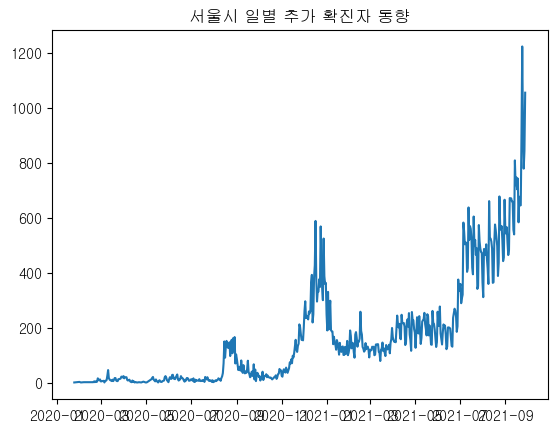

In [24]:
# 서울시 일별 추가확진자 시각화( x축 : 확진일, y축 : 확진자 수 )
plt.plot(s_date.index, s_date.values)
plt.title('서울시 일별 추가 확진자 동향')
plt.show()

### 3.3. 서울시 구별 누적확진자 비교

In [25]:
df_구

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [32]:
# 서울시 구별 누적확진자 많은 순으로 보기 
s_gu = df_구.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

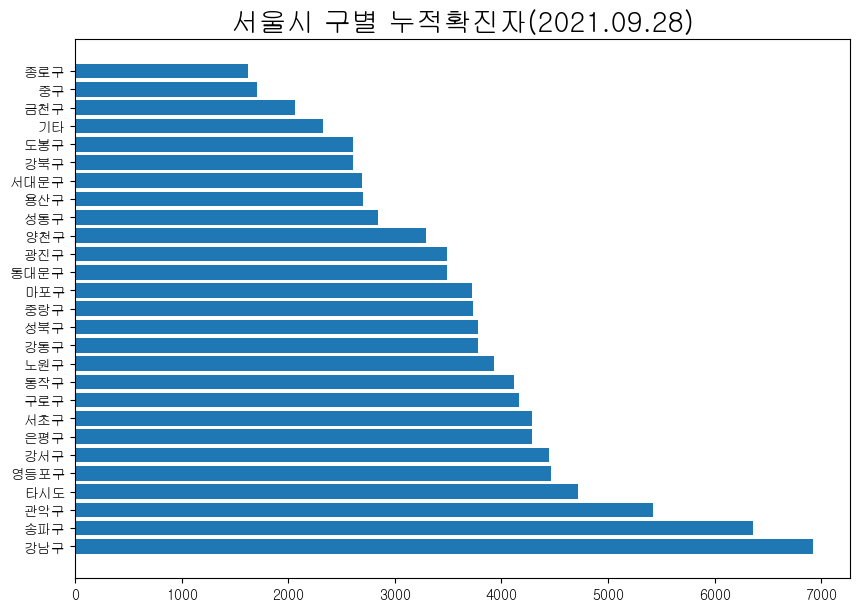

In [38]:
# 서울시 구별 누적확진자 많은 순으로 보기
plt.figure(figsize=(10, 7))
plt.barh(s_gu.index, s_gu.values) # 가로 막대형으로 표현
plt.title('서울시 구별 누적확진자(2021.09.28)', size=20)
plt.show()

### 3.4. 최근일 기준 지역별 추가확진자 수 

In [39]:
df_구

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


최근 서울시 구별 추가확진자이므로, All 행 위에 2021년 9월 28일 추가확진자 항목만 가져와서 볼 예정이다. 

In [44]:
# 마지막 all 컬럼을 slice하고, 높은 순으로 정렬한다. 
s_gu = df_구.iloc[-2][:-1].sort_values(ascending=False)
s_gu

지역
송파구     68
동대문구    66
기타      65
구로구     55
강동구     51
관악구     48
마포구     47
은평구     47
강남구     45
타시도     43
영등포구    43
성북구     41
강서구     41
중구      37
광진구     36
도봉구     35
금천구     31
서대문구    30
노원구     29
동작구     28
양천구     27
중랑구     26
강북구     25
성동구     24
용산구     24
종로구     23
서초구     19
Name: 2021-09-28 00:00:00, dtype: int64

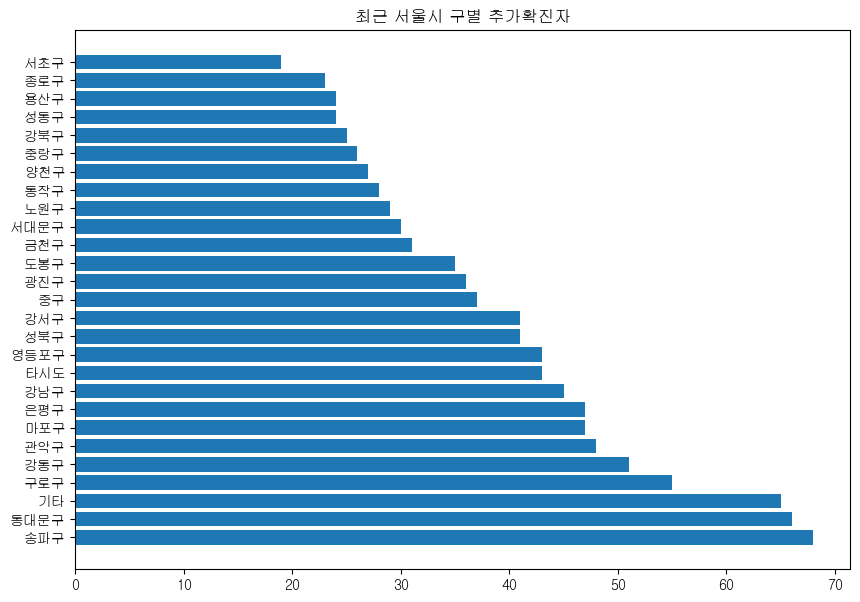

In [45]:
plt.figure(figsize=(10, 7))
plt.barh(s_gu.index, s_gu.values)
plt.title('최근 서울시 구별 추가확진자')
plt.show()

## 4. 접촉력에 따른 확진 분석 

### 4.1. 접촉력에 따른 확진 건수 Best10

In [48]:
df['접촉력'].value_counts()
# 값의 수를 기준으로 자동으로 정렬되어 출력된다. 

기타 확진자 접촉        37943
감염경로 조사중         31964
타시도 확진자 접촉        4244
해외유입              1729
동부구치소 관련          1175
                 ...  
구로구소재 고등학교 관련        1
광진구 소재 병원 관련         1
해외 유입                1
부산시 방문주사 관련          1
안양 목회자 관련            1
Name: 접촉력, Length: 1096, dtype: int64

In [50]:
# top 10만 보고 싶다.
df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


### 4.2. 최근 월 접촉력에 따른 확진 건수 best10
- 2021-09

In [56]:
df[(df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)]['접촉력'].value_counts()[:10].to_frame()

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
강서구 소재 시장 관련,44
